# Logistic Regression

## Load libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data/clean_data.csv")

In [3]:
data

,age,meals/day,physical_illness,screen_time,bluelight_filter,smoke/drink,female,male,other_gender,east,north,south,west,no_exercise,seldom_exercise,frequent_exercise,coffee,tea,no_beverage,sleep_time
0,22,2,0,2.00,1,0,False,True,False,False,False,False,True,False,True,False,False,True,False,6.76
1,22,3,0,0.50,0,0,True,False,False,False,False,True,False,True,False,False,True,False,False,8.00
2,23,3,0,0.50,0,0,False,True,False,False,False,True,False,True,False,False,False,True,False,8.00
3,23,2,0,1.50,0,0,True,False,False,True,False,False,False,False,True,False,True,False,False,6.50
4,22,3,0,6.67,1,1,False,True,False,True,False,False,False,False,True,False,True,True,False,6.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,22,3,0,0.50,0,0,False,True,False,True,False,False,False,False,True,False,False,True,False,6.00
88,21,2,0,6.67,0,0,False,True,False,True,False,False,False,False,True,False,False,True,False,7.00
89,24,3,0,6.67,1,0,False,True,False,True,False,False,False,False,True,False,False,False,True,4.00
90,25,3,1,6.67,1,1,False,False,True,True,False,False,False,False,False,True,True,True,False,8.00


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                92 non-null     int64  
 1   meals/day          92 non-null     int64  
 2   physical_illness   92 non-null     int64  
 3   screen_time        92 non-null     float64
 4   bluelight_filter   92 non-null     int64  
 5   smoke/drink        92 non-null     int64  
 6   female             92 non-null     bool   
 7   male               92 non-null     bool   
 8   other_gender       92 non-null     bool   
 9   east               92 non-null     bool   
 10  north              92 non-null     bool   
 11  south              92 non-null     bool   
 12  west               92 non-null     bool   
 13  no_exercise        92 non-null     bool   
 14  seldom_exercise    92 non-null     bool   
 15  frequent_exercise  92 non-null     bool   
 16  coffee             92 non-nu

All columns are ready for analysis

# Scikit-learn imports

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

## Preparing data for train test split

In [6]:
X = data.drop(["sleep_time"],axis = 1)
y = data['sleep_time'].apply(lambda x: 1 if x >= 7 else 0)

### Train test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression Model

In [8]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

# Predictions

In [9]:
y_pred_train = model.predict(X_train)
y_prob_train = model.predict_proba(X_train)[:, 1]
y_pred_test = model.predict(X_test)
y_prob_test = model.predict_proba(X_test)[:, 1]

## Evaluation metrics for training data

In [10]:
print("Training Results:")
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train))
print("Recall:", recall_score(y_train, y_pred_train))
print("F1 Score:", f1_score(y_train, y_pred_train))
print("Classification Report:\n", classification_report(y_train, y_pred_train))

Training Results:
Accuracy: 0.875
Precision: 0.8863636363636364
Recall: 0.9285714285714286
F1 Score: 0.9069767441860465
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.77      0.81        22
           1       0.89      0.93      0.91        42

    accuracy                           0.88        64
   macro avg       0.87      0.85      0.86        64
weighted avg       0.87      0.88      0.87        64



## Evaluation metrics for test data

In [11]:
print("Test Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test))
print("Recall:", recall_score(y_test, y_pred_test))
print("F1 Score:", f1_score(y_test, y_pred_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test))

Test Results:
Accuracy: 0.8571428571428571
Precision: 0.8333333333333334
Recall: 0.9375
F1 Score: 0.8823529411764706
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.83      0.94      0.88        16

    accuracy                           0.86        28
   macro avg       0.87      0.84      0.85        28
weighted avg       0.86      0.86      0.85        28



## ROC Curve train

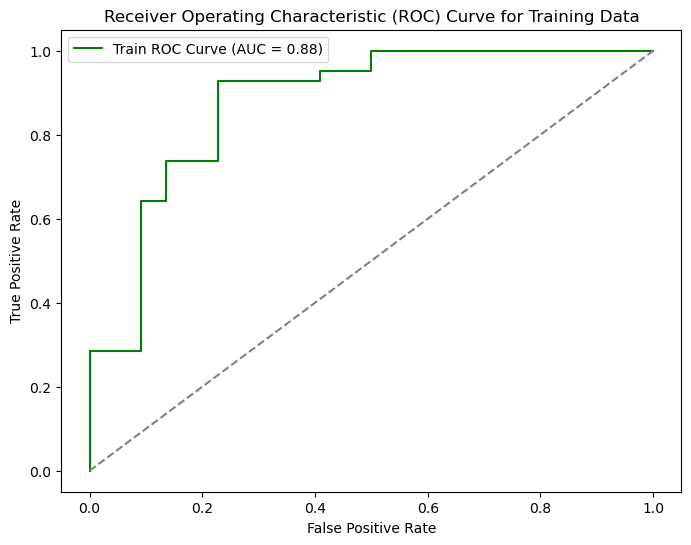

In [12]:
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_prob_train)
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='green', label='Train ROC Curve (AUC = %0.2f)' % auc(fpr_train, tpr_train))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Training Data')
plt.legend()
plt.show()

## ROC Curve test

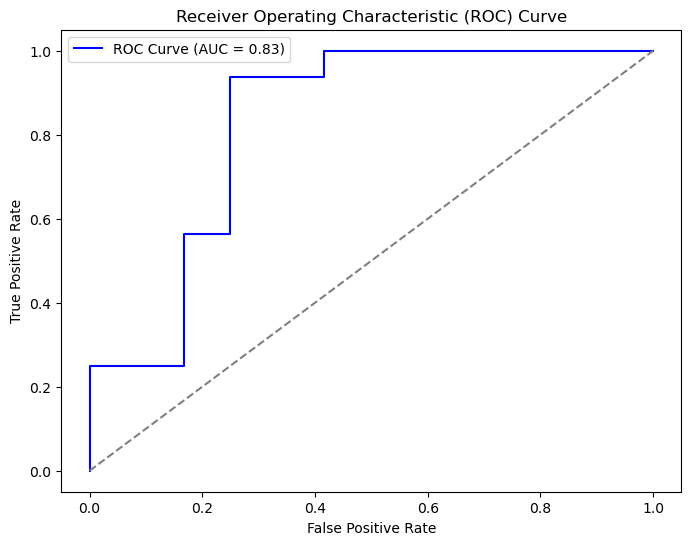

In [13]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob_test)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Confusion Matrix Train

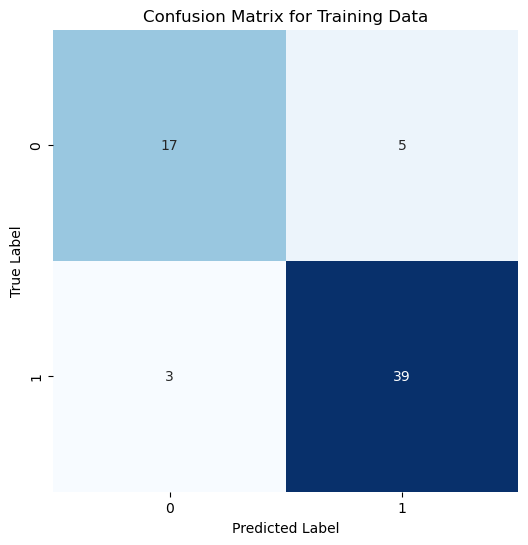

In [14]:
cm_train = confusion_matrix(y_train, y_pred_train)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Training Data')
plt.show()

## Confusion Matrix Test

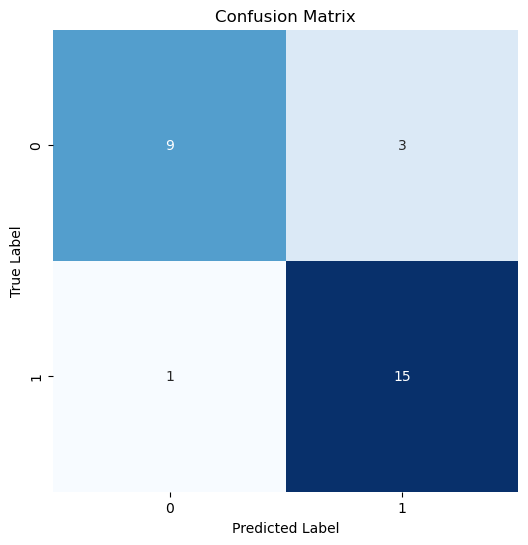

In [15]:
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Coefficient table

In [16]:
# Coefficient table
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
# Resetting the index and dropping the 'index' column
coefficients = coefficients.reset_index().drop(['index'], axis=1)
coefficients

,Feature,Coefficient
0,no_beverage,0.907254
1,north,0.797334
2,south,0.702015
3,smoke/drink,0.463489
4,no_exercise,0.400117
5,screen_time,0.253920
6,frequent_exercise,0.215719
7,male,0.162992
8,age,-0.023314
9,female,-0.023345
